## Assignment-10
### Data Analytics-III
1. Implement Simple Naïve Bayes classification algorithm using
Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision,
Recall on the given dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
print("\n\nThe features in the dataset are as follows : ")
print("1. Sepal length : ", df['sepal_length'].dtype)
print("2. Sepal width : ", df['sepal_width'].dtype)
print("3. Petal length : ", df['petal_length'].dtype)
print("4. Petal width : ", df['petal_width'].dtype)
print("5. Species : ", df['species'].dtype)



The features in the dataset are as follows : 
1. Sepal length :  float64
2. Sepal width :  float64
3. Petal length :  float64
4. Petal width :  float64
5. Species :  object


<Axes: xlabel='sepal_length', ylabel='Count'>

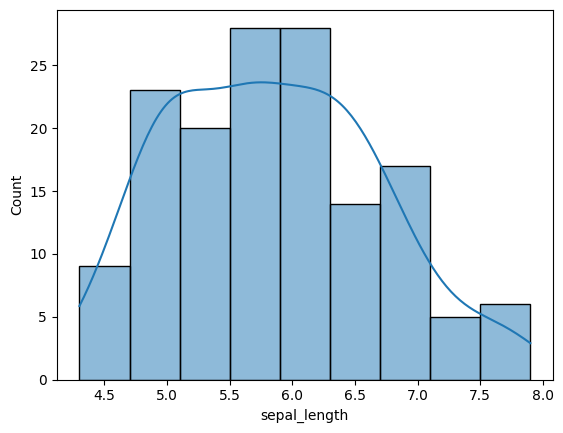

In [8]:
#PLotting the histogram of sepal_length
sns.histplot(x = df['sepal_length'], kde=True)

<Axes: ylabel='sepal_length'>

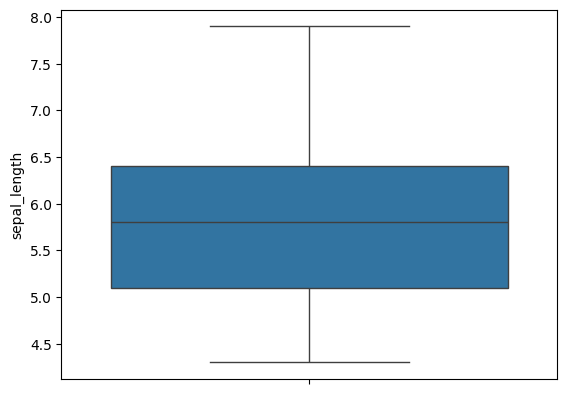

In [9]:
#Checking the outliers in any one feature
sns.boxplot(df['sepal_length'])

<Axes: ylabel='sepal_width'>

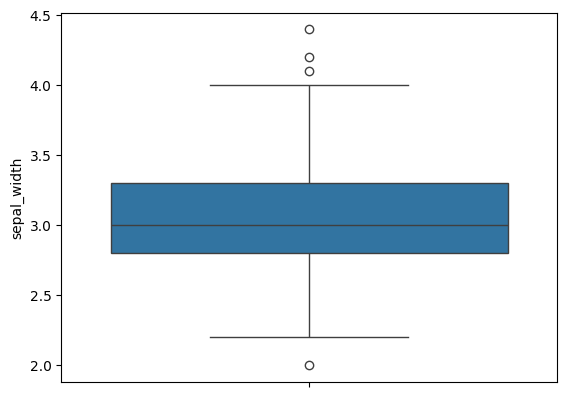

In [10]:
#Checking the outliers in any one feature
sns.boxplot(df['sepal_width'])

### Training the model: Simple Naïve Bayes classification algorithm

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#Defining train and test variables
X = df.drop(['species'], axis=1)
y = df.drop(['sepal_length',  'sepal_width',  'petal_length',  'petal_width'], axis=1)

#Splitting training and testing data in 70:30 ratio resp.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Creating a Gaussain model
model = GaussianNB()

#Training the model
model.fit(X_train, y_train)

#Predict the target variable
y_pred = model.predict(X_test)

# Check training and testing score
print("Training accuracy:", model.score(X_train, y_train) * 100)
print("Testing accuracy:", model.score(X_test, y_test) * 100)

Training accuracy: 97.14285714285714
Testing accuracy: 93.33333333333333


/home/naveed-malik/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[16  0  0]
 [ 0 11  0]
 [ 0  3 15]]



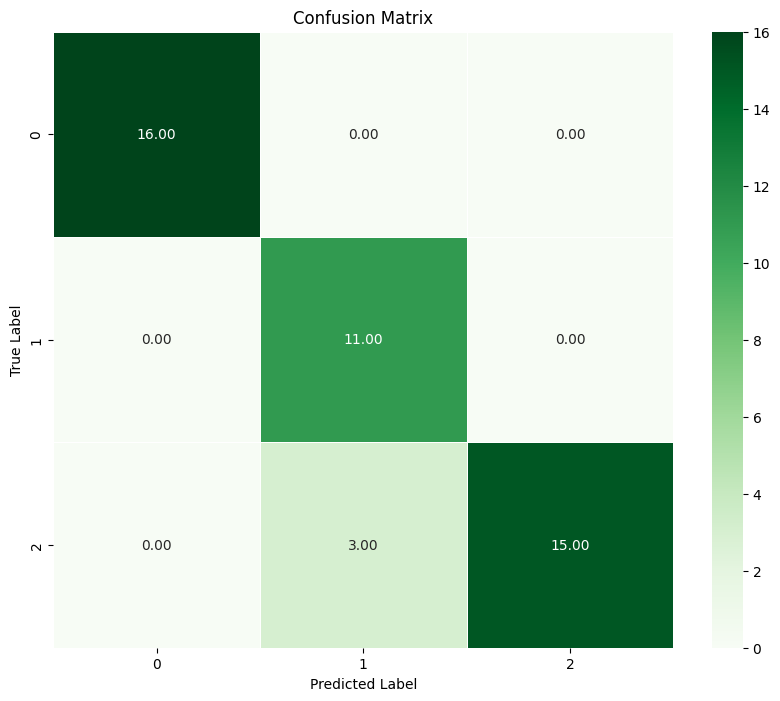



True Positives (TP): 16
False Positives (FP): 0
True Negatives (TN): 11
False Negatives (FN): 0

Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0]
FP = cm[0][1]
TN = cm[1][1]
FN = cm[1][0]


accuracy = (TP+TN)/(TP+TN+FP+FN)


error_rate = 1 - accuracy

precision = TP/(TP+FP) 
recall = TP/(TP+FN)
f1 = 2*(precision*recall) / (precision + recall)


print(f"Confusion Matrix:\n{cm}\n")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}\n")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


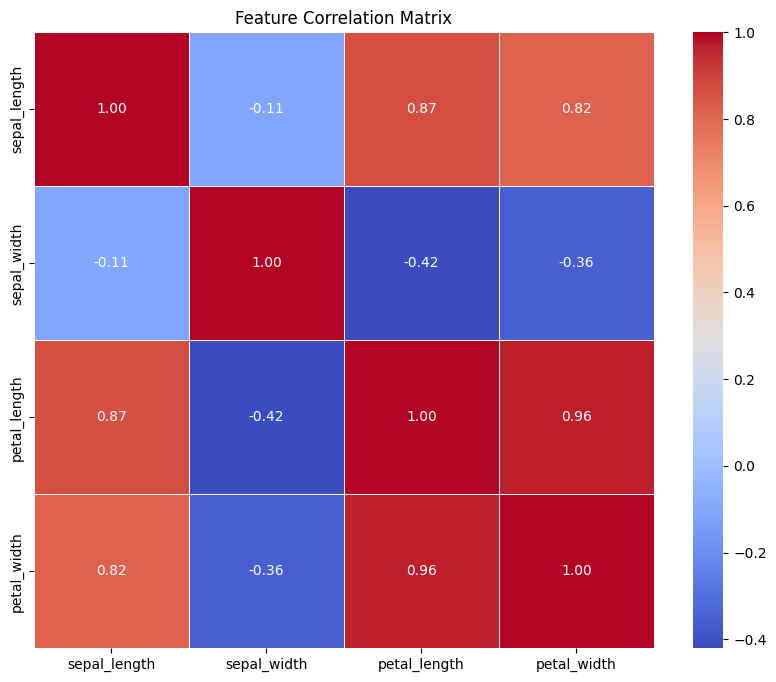

In [15]:
correlation_matrix = df.drop('species', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()